In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [34]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
print(len(x_train))

60000


In [36]:
print(len(x_test))

10000


In [37]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [38]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [39]:
# resize and normalize
image_size = x_train.shape[1]
print(image_size)
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

28


In [40]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [41]:
#spli validation from train
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state=42)

In [42]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 64 #128
units = 256
dropout = 0.2
epochs = 40

In [43]:
#model is RNN with 256 units
model = Sequential()

#model.add(LSTM(units=units,input_shape=input_shape))
model.add(LSTM(units=units,dropout=dropout,input_shape=input_shape))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(356, activation='relu'))
model.add(Dense(356, activation='relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               291840    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 356)               45924     
                                                                 
 dense_18 (Dense)            (None, 356)               127092    
                                                                 
 dense_19 (Dense)            (None, 10)                3570      
                                                                 
 activation_3 (Activation)   (None, 10)               

In [44]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# train the network
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(x_val,y_val))

Epoch 1/40
750/750 [==============================] - 39s 49ms/step - loss: 2.2741 - accuracy: 0.2191 - val_loss: 2.2127 - val_accuracy: 0.2177
Epoch 2/40
750/750 [==============================] - 36s 48ms/step - loss: 1.9949 - accuracy: 0.2877 - val_loss: 1.7187 - val_accuracy: 0.3934
Epoch 3/40
750/750 [==============================] - 35s 47ms/step - loss: 1.4566 - accuracy: 0.4729 - val_loss: 1.1153 - val_accuracy: 0.5975
Epoch 4/40
750/750 [==============================] - 37s 49ms/step - loss: 0.8866 - accuracy: 0.6879 - val_loss: 0.6582 - val_accuracy: 0.7829
Epoch 5/40
750/750 [==============================] - 37s 49ms/step - loss: 0.6438 - accuracy: 0.7775 - val_loss: 0.5192 - val_accuracy: 0.8230
Epoch 6/40
750/750 [==============================] - 36s 48ms/step - loss: 0.5052 - accuracy: 0.8280 - val_loss: 0.3834 - val_accuracy: 0.8744
Epoch 7/40
750/750 [==============================] - 37s 49ms/step - loss: 0.4074 - accuracy: 0.8656 - val_loss: 0.3155 - val_accuracy:

1500/1500 [==============================] - 27s 18ms/step - loss: 0.0420 - accuracy: 0.9867
0.9867083430290222
0.04196273908019066
313/313 [==============================] - 6s 17ms/step - loss: 0.0587 - accuracy: 0.9811
0.9811000227928162
0.05872613564133644


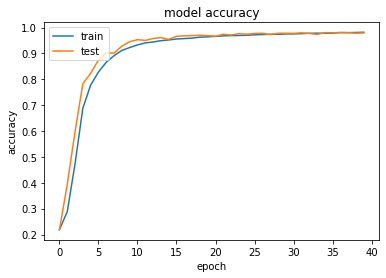

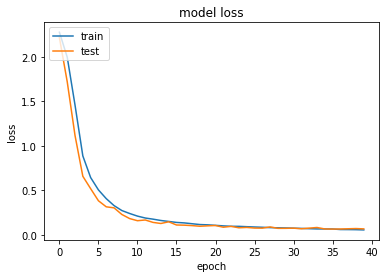

In [45]:
train_loss , train_accuracy=model.evaluate(x_train,y_train)
print(train_accuracy)
print(train_loss)
loss , accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)
y_pred = model.predict(x_test)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 974    0    0    0    0    0    1    1    3    1]
 [   0 1130    1    0    0    0    1    0    3    0]
 [   5    1 1015    0    0    0    2    1    8    0]
 [   0    0    2  995    0    2    0    3    6    2]
 [   1    0    1    0  957    0    6    0    1   16]
 [   3    0    1   12    0  856    4    1   12    3]
 [   4    2    1    0    0    1  947    0    3    0]
 [   2    2   12    3    0    0    0  994    6    9]
 [   1    0    1    0    0    1    1    2  966    2]
 [   4    2    0    3    7    1    0    2   13  977]]


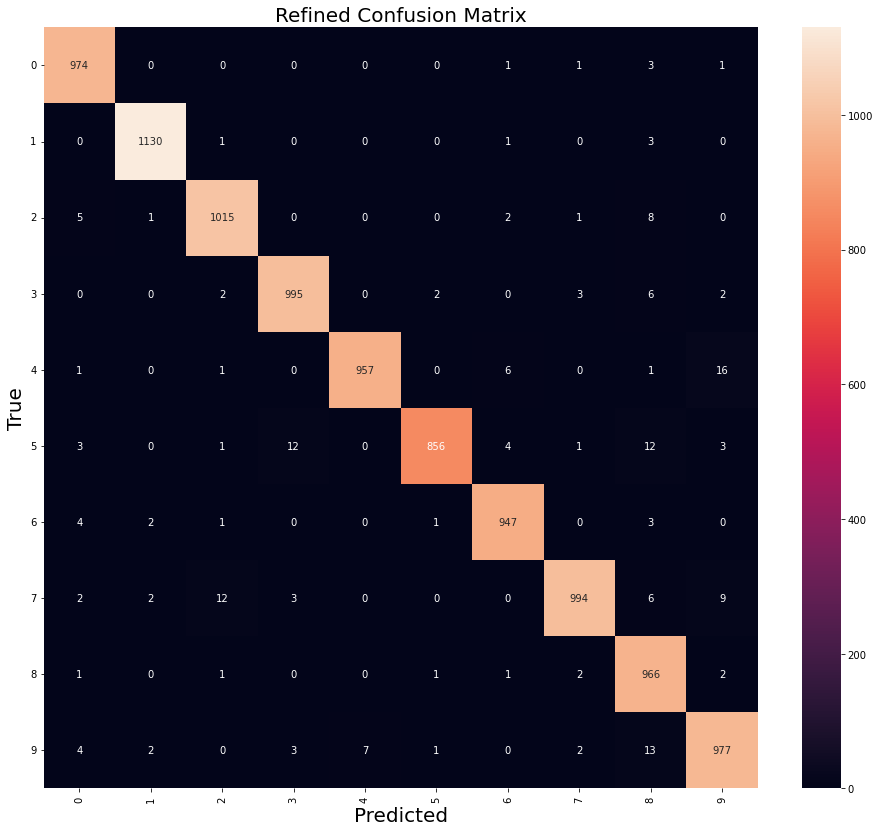

In [47]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(num_labels,fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(num_labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()